## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

## Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.

## Импорт библиотек и первичный анализ данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
data = pd.read_csv("heart.csv")

In [5]:
# Первые 5 строк датасета
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Размер датасета - 303 строк, 14 колонок
data.shape

(303, 14)

In [7]:
# Список колонок с типами данных
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
# Количество пропусков в данных
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 303


In [10]:
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
target=data.output
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=1)

In [27]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0


In [28]:
X_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0


In [23]:
y_train.head()

34     1
185    0
187    0
147    1
202    0
Name: output, dtype: int64

In [29]:
y_test.head()

204    0
159    1
219    0
174    0
184    0
Name: output, dtype: int64

In [30]:
X_train.shape, y_train.shape

((212, 14), (212,))

In [32]:
total_count_data_X_train=X_train.shape[0]
total_count_data_X_test=X_test.shape[0]
total_count_data_y_train=y_train.shape[0]
total_count_data_y_test=y_test.shape[0]
print('Всего строк train:{}, test:{}'.format(total_count_data_X_train, total_count_data_X_test))

Всего строк train:212, test:91


## Обучение

In [33]:
X_train[['trtbps','chol']]

,trtbps,chol
34,125,213
185,112,290
187,124,266
147,150,240
202,150,270
...,...,...
203,180,274
255,142,309
72,130,204
235,140,299


In [34]:
# Первая строка тестовой выборки
data_test_0=[x for x in X_test[['trtbps','chol']].iloc[0]]
data_test_0

[160, 164]

In [41]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)

In [43]:
KNeighborsClassifierObj.fit(X_train[['trtbps','chol']], X_train['output'])
KNeighborsClassifierObj.predict(X_test[['trtbps','chol']])

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [45]:
KNeighborsRegressorObj = KNeighborsRegressor()

In [46]:
KNeighborsRegressorObj.fit(X_train[['trtbps','chol']], X_train['output'])
KNeighborsRegressorObj.predict(X_test[['trtbps','chol']])

array([0.4, 0.6, 0.4, 0.8, 0.8, 0.4, 0. , 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.8, 0.6, 0.8, 0.2, 0.6, 0.6, 0.4, 0.6, 0.4, 0.6,
       0.8, 0.2, 0.4, 0.6, 0.6, 0.8, 1. , 0.4, 0.4, 0.6, 0.4, 0.2, 0.4,
       0.6, 0.8, 0.8, 0.6, 0.2, 0.6, 0.4, 0.8, 0.4, 0.2, 0.4, 0.8, 1. ,
       0.8, 0.4, 0.4, 0.6, 0.8, 0.6, 0.4, 0.4, 0.4, 0.6, 0.4, 0.6, 0.6,
       0.6, 0.6, 0.8, 0.6, 0.4, 0.2, 0.8, 0.6, 1. , 0.4, 0.4, 0.4, 0.6,
       0.6, 0.8, 0. , 0.4, 0.4, 0.8, 0.2, 0.2, 0.8, 1. , 0.6, 1. , 0.8])

In [47]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [48]:
print_class_proportions(y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 97 	 	 45.75%
1 	 115 	 	 54.25%


In [49]:
print_class_proportions(y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 41 	 	 45.05%
1 	 50 	 	 54.95%


## Построим базовую модель на основе метода ближайших соседей

In [50]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(X_train, y_train)
target1_1 = cl1_1.predict(X_test)
len(target1_1), target1_1

(91,
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0], dtype=int64))

In [52]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(X_train, y_train)
target1_2 = cl1_2.predict(X_test)
len(target1_2), target1_2

(91,
 array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0], dtype=int64))

In [53]:
accuracy_score(y_test, target1_1)

0.5054945054945055

In [54]:
accuracy_score(y_test, target1_2)

0.5604395604395604

In [55]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [56]:
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
0 	 0.6829268292682927
1 	 0.36


In [57]:
print_accuracy_score_for_classes(y_test, target1_2)

Метка 	 Accuracy
0 	 0.6097560975609756
1 	 0.52


In [69]:
# Конвертация целевого признака в бинарный
#def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
   #res = [1 if x==target else 0 for x in array]
    #return res

In [68]:
#bin_y_train = convert_target_to_binary(y_train, 2)
#list(zip(y_train, bin_y_train))[:10]

In [65]:
balanced_accuracy_score(y_test, target1_1)

0.5214634146341464

In [66]:
balanced_accuracy_score(y_test, target1_2)

0.5648780487804879

## Матрица ошибок

In [70]:
confusion_matrix(y_test, target1_1, labels=[0, 1])

array([[28, 13],
       [32, 18]], dtype=int64)

In [71]:
confusion_matrix(y_test, target1_2, labels=[0, 1])

array([[25, 16],
       [24, 26]], dtype=int64)

In [79]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[28 13]
 [32 18]]


<AxesSubplot:title={'center':'Confusion matrix without normalization K=2'}, xlabel='Predicted label', ylabel='True label'>

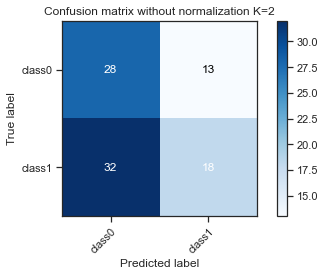

In [85]:
plot_confusion_matrix(y_test, target1_1, classes=np.array(['class0','class1']),title='Confusion matrix without normalization K=2')

Confusion matrix, without normalization
[[25 16]
 [24 26]]


<AxesSubplot:title={'center':'Confusion matrix without normalization K=10'}, xlabel='Predicted label', ylabel='True label'>

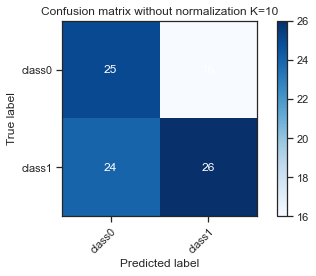

In [86]:
plot_confusion_matrix(y_test, target1_2, classes=np.array(['class0','class1']),title='Confusion matrix without normalization K=10')

Normalized confusion matrix
[[0.68292683 0.31707317]
 [0.64       0.36      ]]


<AxesSubplot:title={'center':'Confusion normalize matrix K=2'}, xlabel='Predicted label', ylabel='True label'>

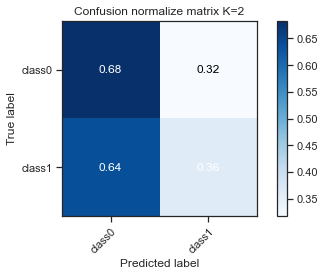

In [84]:
plot_confusion_matrix(y_test, target1_1, classes=np.array(['class0','class1']), normalize=True ,title='Confusion normalize matrix K=2')

Normalized confusion matrix
[[0.6097561 0.3902439]
 [0.48      0.52     ]]


<AxesSubplot:title={'center':'Confusion matrixnormalize K=10'}, xlabel='Predicted label', ylabel='True label'>

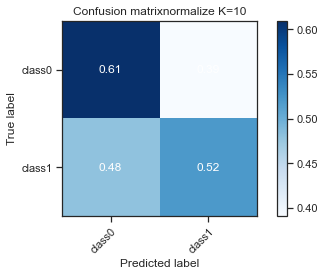

In [87]:
plot_confusion_matrix(y_test, target1_2, classes=np.array(['class0','class1']), normalize=True ,title='Confusion matrixnormalize K=10')

## Метрика precision

In [88]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(y_test, target1_1), recall_score(y_test, target1_1)

(0.5806451612903226, 0.36)

In [89]:
# Для 10 ближайших соседей
precision_score(y_test, target1_2), recall_score(y_test, target1_2)

(0.6190476190476191, 0.52)

In [91]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(y_test, target1_1, average='micro')

0.5054945054945055

In [93]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса и берется среднее значение, дисбаланс классов не учитывается.
precision_score(y_test, target1_1, average='macro')

0.5236559139784946

In [96]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса и берется средневзвешенное значение, дисбаланс классов учитывается в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(y_test, target1_1, average='weighted')

0.529292213163181

## Кросс-валидация

In [97]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [98]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train, cv=3)

In [99]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.5915493 , 0.5915493 , 0.58571429])

In [100]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.5896042924211938

In [101]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted'}

In [102]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00697803, 0.00199437, 0.00495434]),
 'score_time': array([0.00798249, 0.00797963, 0.00700951]),
 'test_precision': array([0.6288208 , 0.61654623, 0.60096119]),
 'train_precision': array([0.87951322, 0.85846107, 0.86566136]),
 'test_recall': array([0.5915493 , 0.5915493 , 0.58571429]),
 'train_recall': array([0.83687943, 0.79432624, 0.80985915])}

## Стратегии кросс-валидации

## 1) K-fold

In [103]:
# Возвращаются индексы элементов
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [104]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [106]:
kf = KFold(n_splits=3)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train,
                         cv=kf)
scores

array([0.6056338 , 0.63380282, 0.62857143])

In [108]:
kf = KFold(n_splits=3)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00398827, 0.00199389, 0.00498796]),
 'score_time': array([0.00897765, 0.00597763, 0.00797915]),
 'test_precision': array([0.61634766, 0.63977806, 0.70204082]),
 'train_precision': array([0.8848362 , 0.86389354, 0.83809524]),
 'test_recall': array([0.6056338 , 0.63380282, 0.62857143]),
 'train_recall': array([0.84397163, 0.80141844, 0.76056338])}

## 2) Leave One Out (LOO)

In [109]:
X = range(12)
# Эквивалент KFold(n_splits=n)
kf = LeaveOneOut()
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


In [110]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train,
                         cv=LeaveOneOut())
scores

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1.])

In [111]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=LeaveOneOut(), return_train_score=True)
scores

e-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no t

{'fit_time': array([0.00398827, 0.00398827, 0.00498462, 0.00199389, 0.00202131,
        0.00202537, 0.00299335, 0.00299191, 0.00399041, 0.00299287,
        0.00299263, 0.00201392, 0.00301313, 0.00299239, 0.00199342,
        0.00298762, 0.00199533, 0.00398922, 0.00398898, 0.00199389,
        0.00199366, 0.00199461, 0.00351095, 0.00299072, 0.00299168,
        0.00398874, 0.00299168, 0.00199628, 0.00299215, 0.00299096,
        0.00299335, 0.00299191, 0.00199389, 0.00298953, 0.00501204,
        0.00798011, 0.00498629, 0.00299191, 0.00299144, 0.00299215,
        0.0019989 , 0.00299382, 0.00398993, 0.00498009, 0.00698018,
        0.00398827, 0.0039897 , 0.00299263, 0.00398731, 0.00199413,
        0.00399518, 0.00498605, 0.00398803, 0.00299215, 0.00299263,
        0.00199437, 0.00199437, 0.00299215, 0.00199604, 0.00199533,
        0.00199437, 0.00299263, 0.00199509, 0.00331378, 0.0029912 ,
        0.00202727, 0.0039897 , 0.00298762, 0.00301242, 0.0029912 ,
        0.00299311, 0.00303149, 0.00

## 3) Repeated K-Fold

In [112]:
X = range(12)
kf = RepeatedKFold(n_splits=3, n_repeats=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 0  1  3  4  6  7  9 11] [ 2  5  8 10]
[ 1  2  3  4  5  8 10 11] [0 6 7 9]
[ 0  2  5  6  7  8  9 10] [ 1  3  4 11]
[ 2  3  4  5  6  7  9 10] [ 0  1  8 11]
[ 0  1  5  6  7  8 10 11] [2 3 4 9]
[ 0  1  2  3  4  8  9 11] [ 5  6  7 10]


In [113]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train,
                         cv=RepeatedKFold(n_splits=3, n_repeats=2))
scores

array([0.57746479, 0.67605634, 0.61428571, 0.6056338 , 0.5915493 ,
       0.6       ])

In [114]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=RepeatedKFold(n_splits=3, n_repeats=2), return_train_score=True)
scores

{'fit_time': array([0.00498581, 0.00398946, 0.00398731, 0.00399041, 0.00299191,
        0.00299335]),
 'score_time': array([0.00997448, 0.00797868, 0.00798011, 0.00797629, 0.00598526,
        0.00797701]),
 'test_precision': array([0.67987386, 0.7014867 , 0.64120523, 0.67183598, 0.69073071,
        0.56785714]),
 'train_precision': array([0.87674248, 0.86532616, 0.84748897, 0.87484355, 0.85170858,
        0.86921529]),
 'test_recall': array([0.66197183, 0.67605634, 0.58571429, 0.66197183, 0.61971831,
        0.54285714]),
 'train_recall': array([0.82978723, 0.80851064, 0.77464789, 0.82269504, 0.78723404,
        0.81690141])}

## Оптимизация гиперпараметров

In [115]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [117]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [118]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00280237, 0.00259399, 0.00241184, 0.00297899, 0.00339537,
        0.00239491, 0.00278783, 0.00259705, 0.00338745, 0.00319085]),
 'std_fit_time': array([0.00039504, 0.00048658, 0.00049702, 0.00062167, 0.001015  ,
        0.00048979, 0.00041187, 0.00048208, 0.00079538, 0.0007448 ]),
 'mean_score_time': array([0.00357742, 0.00438752, 0.00377245, 0.00420141, 0.00398364,
        0.00498629, 0.00379429, 0.00398502, 0.00439162, 0.00398979]),
 'std_score_time': array([4.78191607e-04, 4.99590499e-04, 7.44321213e-04, 3.92895763e-04,
        8.92047230e-04, 8.94368084e-04, 7.48431862e-04, 8.42883021e-06,
        1.00951946e-03, 6.33168335e-04]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [119]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [120]:
# Лучшее значение метрики
clf_gs.best_score_

0.6462901439645625

In [121]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 10}

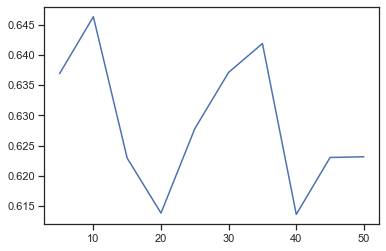

In [122]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Randomized Search

In [124]:
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [125]:
# В данном случае оба способа нашли одинаковое решение
clf_rs.best_score_, clf_rs.best_params_

(0.6462901439645625, {'n_neighbors': 10})

In [126]:
clf_gs.best_score_, clf_gs.best_params_

(0.6462901439645625, {'n_neighbors': 10})

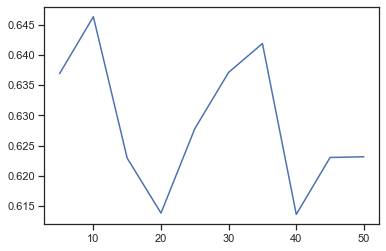

In [127]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

## Построение кривых обучения

In [128]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

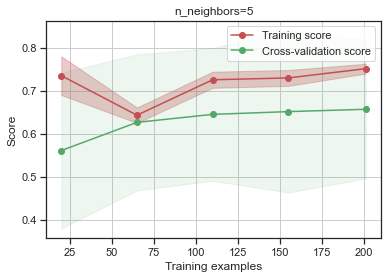

In [129]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=5', 
                    X_train, y_train, cv=20)

## Построение кривой валидации

In [130]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

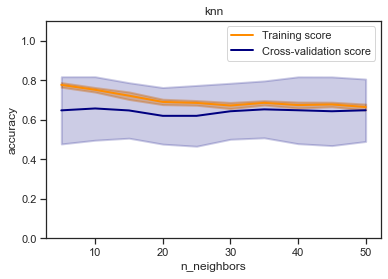

In [131]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")